
# Momento de Retroalimentación: Módulo 2 Análisis y Reporte sobre el desempeño del modelo
Jacobo Hirsch Rodriguez A00829679


# Definición de datos y librerias


In [28]:
from google.colab import drive

drive.mount("/content/gdrive")
!pwd  # show current path

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/My Drive/ITESM ITC/Septimo semestre/Datasets


In [ ]:
%cd "/content/gdrive/MyDrive/ITESM ITC/Septimo semestre/Datasets"
!ls  # show current directory

/content/gdrive/MyDrive/ITESM ITC/Septimo semestre/Datasets
amazon_product.csv  iris.data  mc-donalds-menu.csv  titanic  Valhalla23.csv  wine.data	wine.names


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split #se usa para dividir un conjunto de datos en dos subconjuntos: entrenamiento y prueba.
from sklearn.linear_model import SGDRegressor # implementa un modelo de regresión lineal utilizando un algoritmo de descenso de gradiente estocástico.
from sklearn.metrics import mean_squared_error #Función para calcular el error cuadrático medio (MSE), una métrica que mide el rendimiento de un modelo de regresión.
import matplotlib.pyplot as plt #se utiliza para crear visualizaciones de datos en Python.
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression



In [ ]:
valhalla = pd.read_csv("Valhalla23.csv")
valhalla.head()

,Celsius,Valks
0,61.4720,-139.740
1,70.5790,-156.600
2,-7.3013,73.269
3,71.3380,-165.420
4,43.2360,-75.835


definimos la semilla con los ultimos cuatro digitos de mi matricula que es A00829679

In [ ]:
semilla = 9679


**Conjunto de entrenamiento:** Datos usados para aprender y ajustar los parámetros del modelo.


**Conjunto de validación:** Datos empleados para optimizar y ajustar los hiperparámetros del modelo, ayudando a prevenir la sobreadaptación.

**Conjunto de prueba:** Datos utilizados para evaluar el rendimiento final del modelo de manera imparcial.


 divide el set de datos en entrenamiento (40%), validación (40%), y prueba (20%)

 primero inicializamos las variables para su division


In [ ]:
x = valhalla[['Celsius']] #dejamos el doble corchete para que se mantenga como un dataframe (en lugar de una serie de pandas)
y = valhalla['Valks']


despues lo dividimos en 3 partes

In [ ]:
#dividimos los datos en lo que será primero el 20% prueba y el 40% de validacion + el oreo 40% de entrenamiento
# x_train_val y y_train_val contiene el 80% de los datos que se volverán a dividir
#el parametro test_size del método train_test_split es un porcentaje en valor de 0 a 1
x_train_val, x_test, y_train_val, y_test = train_test_split(x, y, test_size=0.2, random_state=semilla)

#ahora vamos a hacer la división del otro conjunto
x_train, x_val, y_train, y_val = train_test_split(x_train_val, y_train_val, test_size=0.5, random_state=semilla)

Entrena un modelo base de tipo SGDRegressor que utilice una tasa de aprendizaje de 1E-4, un máximo de iteraciones de un millón, y que utilice la semilla definida arriba. Al momento de utilizar el modelo SGDRegressor, tenemos que escalar los datos

In [ ]:
# Inicializar el escalador
scaler = StandardScaler()

# Ajustar el escalador a los datos de entrenamiento y transformar tanto los datos de entrenamiento como los de prueba
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)
x_val_scaled =  scaler.transform(x_val)

# Configuracion y entrenamiento
Entrena un modelo base de tipo SGDRegressor que utilice una tasa de aprendizaje de 1E-4, un máximo de iteraciones de un millón, y que utilice la semilla definida arriba

In [ ]:
# Inicializar el modelo con los parámetros elegidos
model = SGDRegressor(penalty='l2', alpha=0.001, max_iter=1000000, learning_rate='optimal', random_state=semilla)

# Ajustar el modelo a los datos de entrenamiento escalados
#model.fit(x_train_scaled, y_train)

model.fit(x_train_scaled, y_train)


SGDRegressor(alpha=0.001, learning_rate='optimal', max_iter=1000000,
             random_state=9679)

se termino utilizando una tasa de entrenamiento diferente ya que la tasa propuesta no estaba dando resultados. dicha tasa se escogio de menera arbitraria y se mantuvo ya que dio resultados positivos.

# Evaluacion del modelo
Calcula el error cuadrático medio para este modelo, sobre los datos de entrenamiento, validación, y prueba. Estos datos servirán como línea base.

In [ ]:

y_train_pred = model.predict(x_train_scaled) #Genera predicciones usando el modelo entrenado para los datos de entrenamiento.
y_test_pred = model.predict(x_test_scaled) #Genera predicciones usando el modelo entrenado para los datos de prueba.
y_val_pred = model.predict(x_val_scaled) #Genera predicciones usando el modelo entrenado para los datos de validación.

#alcula el error cuadrático medio (MSE) para el conjunto de entrenamiento,
#comparando las predicciones (y_train_pred) con los valores reales (y_train).
train_mse = mean_squared_error(y_train, y_train_pred)

#Calcula el MSE para el conjunto de prueba, comparando las predicciones (y_test_pred)
#con los valores reales (y_test).
test_mse = mean_squared_error(y_test, y_test_pred)

#calculamos el MSE para el conjunto de validación, comparando las predicciones (y_val_pred)
# con los valores reales (y_val)
val_mse = mean_squared_error(y_val, y_val_pred)

#imprimimos los resultados de nuestras metricas
print(f"Error Cuadrático Medio en Entrenamiento: {train_mse}")
print(f"Error Cuadrático Medio en Prueba: {test_mse}")
print(f"Error Cuadrático Medio en Prueba: {val_mse}")

Error Cuadrático Medio en Entrenamiento: 95.47031956733436
Error Cuadrático Medio en Prueba: 175.12423900631777
Error Cuadrático Medio en Prueba: 114.53411326863386


Realiza una gráfica donde muestres cada subconjunto de datos (entrenamiento, validación, prueba) y el modelo de regresión obtenido (como una recta)

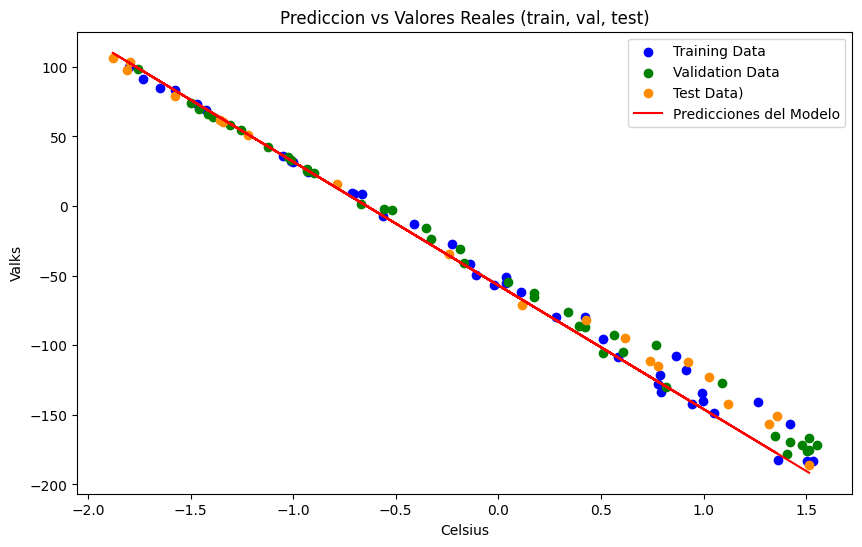

In [ ]:
plt.figure(figsize=(10, 6))



plt.scatter(x_train_scaled, y_train, color='blue', label='Training Data')
plt.scatter(x_val_scaled, y_val, color='green', label='Validation Data')
plt.scatter(x_test_scaled, y_test, color='darkorange', label='Test Data)')

plt.plot(x_test_scaled, y_test_pred, color='red', label='Predicciones del Modelo')



plt.xlabel('Celsius')
plt.ylabel('Valks')
plt.title('Prediccion vs Valores Reales (train, val, test)')
plt.legend()
plt.show()

# Instrucciones del reporte
Crea una lista que contenga 20 elementos (enteros) entre 2 y 39 (sin repetición, y que incluyan el número 2). Estos valores representarán la cantidad de instancias que se usarán para el análisis

In [ ]:
import random

# Generar los números entre 3 y 39
numeros = list(range(3, 40))

# Selecciona 19 números aleatorios sin repetición
numeros = random.sample(numeros, 19)

# Añade el número 2 a la lista
numeros.append(2)

numeros = np.sort(numeros)

print(numeros)

[ 2  3  4  6  7 12 15 16 17 18 20 21 28 29 30 31 33 34 37 39]


Para cada uno de los tamaños del punto anterior, entrena 100 modelos usando un subconjunto aleatorio del set de entrenamiento que contenga esa cantidad de muestras. Por ejemplo, para el tamaño de 2 muestras, se deben entrenar 100 modelos utilizando 2 muestras seleccionadas aleatoriamente de las 40 muestras disponibles en el set de entrenamiento.

Para cada uno de los modelos del punto anterior, calcula el error cuadrático medio en el subconjunto de entrenamiento (el que tiene un número cambiante de muestras), y en el subconjunto de validación.

Calcula el promedio de las 100 repeticiones para cada uno de los modelos y sus errores. Esto debería generar dos listas de 20 valores cada uno, donde cada elemento representa el error promedio de las 100 repeticiones que se hicieron para cada subconjunto de entrenamiento

In [ ]:
# aeeay que  va a almacenar los indices del array
indices_estaticos = np.arange(len(x_train_scaled))

#array que va a almacenar la media del error cuadratico por subconjunto aleatorio  train del conjunto train
error_train = np.zeros(20)

#array que va a almacenar la media del error cuadratico por subconjunto aleatorio  train del conjunto val
error_val = np.zeros(20)



for i, valor in enumerate(numeros):

  #en este array almacenaremos los errores cuadraticos para train
  mean_error_array_train = np.zeros(100)

  #en este array almacenaremos los errores cuadraticos para val
  mean_error_array_val = np.zeros(100)

  for x in range(100):

    #Obtenemos una lista de indices al azar del tamaño de nuestro conjunto valor
    indices = random.sample(indices_estaticos.tolist(), valor)

    #es importante al momento de entrenar un modelo que los valores entre x y y correspondan por lo que ...
    #hacemos un nuevo array para x que contenga los valores de los indices especificados
    new_x_train_scaled = x_train_scaled[indices]
    #hacemos un nuevo array para x que contenga los valores de los indices especificados
    new_y_train_scaled = y_train.to_numpy()[indices]


    #especificamos el modelo
    new_model = SGDRegressor(penalty='l2', alpha=0.001, max_iter=1000000, learning_rate='optimal', random_state=semilla)
    #lo entrenamos
    new_model.fit(new_x_train_scaled, new_y_train_scaled)

    #hacemos una prediccion para el conjunto train (utilizando los valores previamente introducidos)
    new_y_train_pred = new_model.predict(new_x_train_scaled)

    #hacemos una prediccion para el conjunto val (utilizando los valores previamente introducidos) y especificando que es con los valores de los indices
    new_y_val_pred = new_model.predict(x_val_scaled[indices])

    #calculamos el error para ambos, esta parte es un poco tricky por que para el error cuadrativo de val es necesario convertir de series a numpy
    # y tomar los valores correspondientes a los indices
    new_train_mse = mean_squared_error(new_y_train_scaled, new_y_train_pred)
    new_val_mse = mean_squared_error(y_val.to_numpy()[indices], new_y_val_pred)


    #guardamos los errores en el array de errores
    mean_error_array_train[x] = new_train_mse
    mean_error_array_val[x] = new_val_mse

  #calculamos la media de los errores del array donde originalmente guardamos los 100 errores por cada numero de muestras
  mean_error_train = np.mean(mean_error_array_train)
  mean_error_val = np.mean(mean_error_array_val)


  #guardamos las medias calculadas de  errores en el array de errores correspondiente a cada conjunto
  error_train[i] = mean_error_train
  error_val[i] = mean_error_val


Agrega a las listas anteriores los errores de entrenamiento y validación de la línea base


In [ ]:
error_train = np.append(error_train,train_mse)
error_val = np.append(error_val,val_mse)

vamos a agregarle a numeros el valor correspondiente del tamaño de la mas muestras

In [ ]:
numeros = np.append(numeros,40)

Haz una gráfica donde se muestre la evolución del error promedio de entrenamiento y validación, para cada uno de los diferentes tamaños de entrenamiento

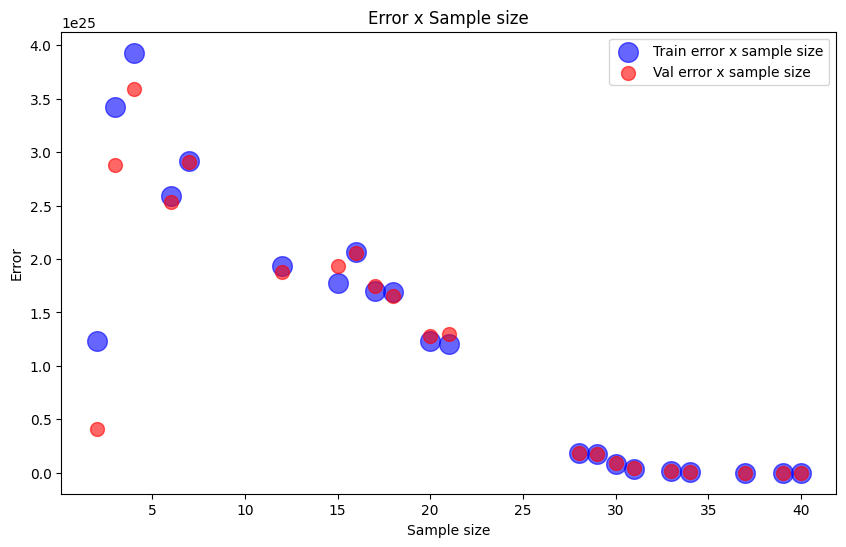

In [ ]:
plt.figure(figsize=(10, 6))

plt.scatter(numeros,error_train,color='blue', alpha=0.6, s=200, label='Train error x sample size')
plt.scatter(numeros,error_val,  color='red',alpha=0.6, s=100, label='Val error x sample size')


plt.xlabel('Sample size')
plt.ylabel('Error')
plt.title('Error x Sample size')
plt.legend()
plt.show()

Con base en la grafica anterior, explica el tipo de ajuste obtenido para el primer modelo (el entrenado sobre 2 muestras) y para el modelo final (el entrenado sobre 40 muestras). También explica como cambia el tipo de ajuste a medida que se incrementa el número de muestras del entrenamiento. Incluye también en tu análisis el grado de sesgo y de varianza para los diferentes modelos.Con base en la gráfica y los datos, identifica la cantidad de muestras más adecuada para realizar el entrenamiento. Justifica tu selección.



# Explicación del ajuste para 2 y 40 muestras

A medida que incrementa el número de muestras de entrenamiento, el modelo pasa de estar claramente subajustado con pocas muestras (como en el caso de 2 muestras, donde no puede aprender patrones significativos y tiene errores altos en todos los conjuntos) a lograr un ajuste más adecuado con más muestras (como con 40 muestras), donde el modelo tiene suficiente información para captar patrones importantes y generalizar mejor. Inicialmente, con pocas muestras, el error es alto tanto en entrenamiento como en validación, pero a medida que se añaden más datos, el error disminuye y el modelo empieza a ajustarse mejor, mostrando un equilibrio entre los errores en entrenamiento y validación sin caer en el sobreajuste. Mismo que se puede ver con la siguiente explicación de la gráfica.

# Explicacion de la gráfica

En la siguiente grafica se observa como a medida que disminuye el numero de elementos del subjconjunto de entrenamiento de los modelos, aumenta el error de forma significativa. Parece ser que desde 33 muestras en adelante el error no parece disminuir de forma considerable por lo que podriamos hacer una división de datos menor para el entrenamiento y poder evalualar con más datos el modelo.

# Conjunto óptimo de entrenamiento vs Máximo
Entrena un nuevo modelo utilizando esa cantidad de muestras, y calcula su error cuadrático medio sobre el subconjunto de entrenamiento (el de la cantidad de muestras seleccionadas), el de validación, y el de prueba.

In [ ]:
#Vamos a hacer el array de valores de entrenamiento con 33 muestras
#nos aseguramos que los valores de x correspondan a los de y

optimal_x_train_scaled = x_train_scaled[:33]
optimal_y_train = y_train[:33]


In [ ]:
#ahora vamos a entrenar el modelo
new_model_vs = SGDRegressor(penalty='l2', alpha=0.001, max_iter=1000000, learning_rate='optimal', random_state=semilla)

new_model_vs.fit(optimal_x_train_scaled , optimal_y_train)


SGDRegressor(alpha=0.001, learning_rate='optimal', max_iter=1000000,
             random_state=9679)

In [ ]:
#calculamos el error para cada subconjunto con el modelo optimo


optimal_y_train_pred = new_model_vs.predict(x_train_scaled) #Genera predicciones usando el modelo entrenado para los datos de entrenamiento.
optimal_y_test_pred = new_model_vs.predict(x_test_scaled) #Genera predicciones usando el modelo entrenado para los datos de prueba.
optimal_y_val_pred = new_model_vs.predict(x_val_scaled) #Genera predicciones usando el modelo entrenado para los datos de validación.

#alcula el error cuadrático medio (MSE) para el conjunto de entrenamiento,
#comparando las predicciones (y_train_pred) con los valores reales (y_train).
optimal_train_mse = mean_squared_error(y_train, optimal_y_train_pred)

#Calcula el MSE para el conjunto de prueba, comparando las predicciones (y_test_pred)
#con los valores reales (y_test).
optimal_test_mse = mean_squared_error(y_test, optimal_y_test_pred)

#calculamos el MSE para el conjunto de validación, comparando las predicciones (y_val_pred)
# con los valores reales (y_val)
optimal_val_mse = mean_squared_error(y_val, optimal_y_val_pred)

#imprimimos los resultados de nuestras metricas
print(f"Error Cuadrático Medio en Entrenamiento para el subconjunto optimo de entrenamiento: {optimal_train_mse}")
print(f"Error Cuadrático Medio en Prueba para el subconjunto optimo de entrenamiento: {optimal_test_mse}")
print(f"Error Cuadrático Medio en Prueba para el subconjunto optimo de entrenamiento: {optimal_val_mse}")


Error Cuadrático Medio en Entrenamiento para el subconjunto optimo de entrenamiento: 91.04214699808705
Error Cuadrático Medio en Prueba para el subconjunto optimo de entrenamiento: 170.4639424093911
Error Cuadrático Medio en Prueba para el subconjunto optimo de entrenamiento: 106.27942657728968


Compara los valores del punto anterior contra los errores obtenidos para la línea base (ver punto 5)

In [ ]:

print(f"Diferencia de mse entre conjunto optimo de entrenamiento y base: {optimal_train_mse - train_mse}")
print(f"Diferencia de mse entre conjunto optimo de prueba y base: {optimal_test_mse - test_mse}")
print(f"Diferencia de mse entre conjunto optimo de validacion y base: {optimal_val_mse - val_mse}")

Diferencia de mse entre conjunto optimo de entrenamiento y base: -4.428172569247309
Diferencia de mse entre conjunto optimo de prueba y base: -4.660296596926656
Diferencia de mse entre conjunto optimo de validacion y base: -8.254686691344176


# Análisis de sesgo y varianza entre modelos


***Sesgo (bias):*** Es el error debido a las suposiciones simplificadas que hace el modelo para aprender a partir de los datos. Un alto sesgo significa que el modelo es demasiado simple y no puede captar la complejidad de los datos, lo que resulta en un rendimiento pobre tanto en entrenamiento como en validación. Este es un indicativo de subajuste.

***Varianza (variance):*** Es el error debido a la sensibilidad del modelo a pequeñas variaciones en los datos de entrenamiento. Un modelo con alta varianza ajusta demasiado los datos de entrenamiento (overfitting), lo que puede llevar a un rendimiento deficiente en el conjunto de validación o prueba. Un alto grado de varianza indica que el modelo está capturando detalles específicos o ruido del conjunto de entrenamiento.

##Regla de decisión


Sesgo alto: Si los errores de entrenamiento y validación son altos y no disminuyen mucho al aumentar el tamaño de la muestra, el modelo tiene un alto sesgo y está subajustando.

Varianza alta: Si el error de entrenamiento es bajo pero el error de validación es mucho mayor, esto indica alta varianza, lo que sugiere sobreajuste.


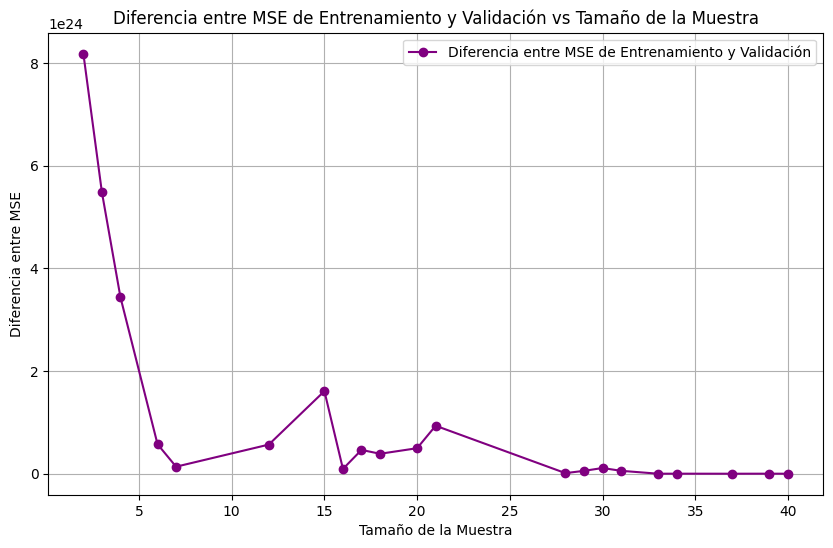

In [ ]:

mse_differences = np.abs(error_train - error_val)

# Graficar la diferencia entre el MSE de entrenamiento y validación
plt.figure(figsize=(10, 6))
plt.plot(numeros, mse_differences, label='Diferencia entre MSE de Entrenamiento y Validación', marker='o', color='purple')
plt.xlabel('Tamaño de la Muestra')
plt.ylabel('Diferencia entre MSE')
plt.title('Diferencia entre MSE de Entrenamiento y Validación vs Tamaño de la Muestra')
plt.grid(True)
plt.legend()
plt.show()


El gráfico muestra que al usar pocas muestras (2-5), el modelo sufre de un alto sobreajuste, con una gran diferencia entre los errores de entrenamiento y validación. A medida que aumenta el tamaño de la muestra, esta diferencia disminuye rápidamente, indicando que el modelo mejora su capacidad de generalización. Alrededor de las 15-20 muestras, hay pequeñas oscilaciones en la diferencia de errores, pero a partir de 30 muestras, el modelo se estabiliza con una diferencia muy pequeña entre los errores de entrenamiento y validación, lo que sugiere que ha alcanzado un buen equilibrio entre sesgo y varianza, generalizando adecuadamente a los datos nuevos.

# Conclusiones

El modelo que mejores resultados tuvo fue el que utilizo menos muestras, en concreto 7 muestras menos. Se puede concluir debido a que la diferencia de errores fue negativa para todos los conjuntos reduciendo asi la posibilidad de que hubiera overfitting. La razón por la que se comporta mejor es compleja y requeriría un análisis mas extenso debido a que puede ser debido a multiples raaones como que existiera ruido en los datos de entrenamiento y se removieron los datos que ocasionaban dicho ruido, un overfitting debido a la cantidad de datos, o incluso un desbalance entre las clases que hiciera un modelo más sesgado. Si se quisieran saber los detalles debería hacerse un análisis exhaustivo para encontrar los multiples posibles factores que ocasionan la discrepancia.

In [29]:
!jupyter nbconvert --to html "/content/gdrive/MyDrive/Colab Notebooks/ITESM Septimo semestre /machine learning/Momento de Retroalimentación: Módulo 2 Análisis y Reporte sobre el desempeño del modelo.ipynb"


[NbConvertApp] Converting notebook /content/gdrive/MyDrive/Colab Notebooks/ITESM Septimo semestre /machine learning/Momento de Retroalimentación: Módulo 2 Análisis y Reporte sobre el desempeño del modelo.ipynb to html
[NbConvertApp] Writing 831289 bytes to /content/gdrive/MyDrive/Colab Notebooks/ITESM Septimo semestre /machine learning/Momento de Retroalimentación: Módulo 2 Análisis y Reporte sobre el desempeño del modelo.html
